# Getting Started

## Primary Objectives

On inspection of the dataset we're going to find that the Austin Animal Center's dataset records 9 different types of outcomes. The objective, in this case, is to find machine learning models that can successfully predict an 'outcome' given the standard data that the center records on animal intake and event outcome.

A successful ML model can, then, help us identify animals who may be at risk and advise on next steps to reach a preferred outcome - or, identify patterns that we may have not previously seen.

## Exploring and Cleaning the Data

To get up and running, we're going to bring in our basic libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('aac_intakes_outcomes.csv')

In [4]:
df.head()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,...,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,...,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,...,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,...,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,...,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79672 entries, 0 to 79671
Data columns (total 41 columns):
age_upon_outcome              79672 non-null object
animal_id_outcome             79672 non-null object
date_of_birth                 79672 non-null object
outcome_subtype               36348 non-null object
outcome_type                  79662 non-null object
sex_upon_outcome              79671 non-null object
age_upon_outcome_(days)       79672 non-null int64
age_upon_outcome_(years)      79672 non-null float64
age_upon_outcome_age_group    79672 non-null object
outcome_datetime              79672 non-null object
outcome_month                 79672 non-null int64
outcome_year                  79672 non-null int64
outcome_monthyear             79672 non-null object
outcome_weekday               79672 non-null object
outcome_hour                  79672 non-null int64
outcome_number                79672 non-null float64
dob_year                      79672 non-null int64
dob_month 

In [6]:
df.shape

(79672, 41)

So, this dataset currently has 41 columns or features for our model, and about ~80K individual histories. It's definitely got a lot of information - hopefully, machine learning can help us find out what's helpful and what isn't.

## Cleaning up the data:  Does This Work Right?

Like all first steps, we should start by reviewing what the dataset distributor says on Kaggle.

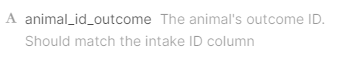

*SHOULD*? Okay.

In [6]:
df.loc[df.animal_id_outcome != df.animal_id_intake]

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days


Well, that was easy.

## Cleaning up the data:  Removing Unnecessary Columns

There's a lot of columns providing details about the outcome itself, and several redundant columns as well. This will help us remove unnecessary predictors and make modeling easier. Let's start by listing off what we're going to drop before we actually drop it.

In [7]:
trash = ['age_upon_outcome', #String object given by integer column age_upon_outcome_(years)
        'animal_id_outcome', #Redundant
        'date_of_birth', #Estimated and also exact - would create false classes of 1 and many
        'age_upon_outcome_(days)', #Not knowable in advance
        'outcome_datetime', #Not knowable
        'outcome_month',
        'outcome_year',
        'outcome_monthyear',
        'outcome_weekday',
        'outcome_hour',
        'outcome_number', #n times an outcome has occurred, fxn of intake_number
        'dob_year', #Estimated 
        'dob_month',
        'dob_monthyear',
        'count', #Set specific helper column
        'age_upon_intake_(days)', #Intake estimate
        'time_in_shelter', #String object give by integer column time_in_shelter_days
        'found_location',
        'intake_datetime', #A past 'year' feature can't be used to predict a future outcome
        'intake_year',
        'intake_monthyear',
        'intake_hour', #Likely a fxn of shelter logistics
        'age_upon_outcome_(years)',
        'age_upon_outcome_age_group',
        ]

In [8]:
df = df.drop(labels = trash, axis = 1)
df.head()

,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_intake,animal_id_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(years),age_upon_intake_age_group,intake_month,intake_weekday,intake_number,time_in_shelter_days
0,NaN,Return to Owner,Neutered Male,10 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,10.0,"(7.5, 10.0]",12,Thursday,1.0,0.588194
1,NaN,Return to Owner,Neutered Male,7 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,7.0,"(5.0, 7.5]",12,Friday,2.0,1.259722
2,NaN,Return to Owner,Neutered Male,6 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,6.0,"(5.0, 7.5]",3,Friday,3.0,1.113889
3,Partner,Transfer,Neutered Male,10 years,A047759,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,10.0,"(7.5, 10.0]",4,Wednesday,1.0,4.970139
4,NaN,Return to Owner,Neutered Male,16 years,A134067,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,16.0,"(15.0, 17.5]",11,Saturday,1.0,0.119444


In [9]:
df.shape

(79672, 17)

In [10]:
df.columns

Index(['outcome_subtype', 'outcome_type', 'sex_upon_outcome',
       'age_upon_intake', 'animal_id_intake', 'animal_type', 'breed', 'color',
       'intake_condition', 'intake_type', 'sex_upon_intake',
       'age_upon_intake_(years)', 'age_upon_intake_age_group', 'intake_month',
       'intake_weekday', 'intake_number', 'time_in_shelter_days'],
      dtype='object')

We're down to just 17 predictors now, so, removing information like this has helped remove some of the dimensions of our problem.

# Cleaning up the data:  Removing Useless Rows

In [11]:
df.isnull().sum()

outcome_subtype              43324
outcome_type                    10
sex_upon_outcome                 1
age_upon_intake                  0
animal_id_intake                 0
animal_type                      0
breed                            0
color                            0
intake_condition                 0
intake_type                      0
sex_upon_intake                  1
age_upon_intake_(years)          0
age_upon_intake_age_group        0
intake_month                     0
intake_weekday                   0
intake_number                    0
time_in_shelter_days             0
dtype: int64

If we want to predict `outcome_type`, I don't want to muck it up with rows that don't have a documented outcome. We can also take out the ones missing sex, since that seems to be a one-off situation. Overall, we're only removing maybe 11 rows total - way less than even 1% of 1% of our total data. This shouldn't impact our final result.

In [12]:
df.loc[df.outcome_type.isnull()]

,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_intake,animal_id_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(years),age_upon_intake_age_group,intake_month,intake_weekday,intake_number,time_in_shelter_days
9016,NaN,NaN,Unknown,1 year,A671017,Other,Fox Mix,Brown/Black,Sick,Wildlife,Unknown,1.000000,"(-0.025, 2.5]",1,Friday,1.0,2.820139
11057,NaN,NaN,Unknown,0 years,A674209,Other,Bat Mix,Brown,Normal,Wildlife,Unknown,0.000000,"(-0.025, 2.5]",3,Sunday,1.0,0.067361
14583,NaN,NaN,Unknown,4 weeks,A679066,Other,Rabbit Sh,Brown,Normal,Wildlife,Unknown,0.076712,"(-0.025, 2.5]",5,Friday,1.0,0.456944
20020,NaN,NaN,Unknown,1 year,A686025,Other,Bat Mix,Brown,Normal,Wildlife,Unknown,1.000000,"(-0.025, 2.5]",8,Friday,1.0,0.574306
44097,NaN,NaN,Neutered Male,10 years,A718046,Dog,Chihuahua Longhair Mix,Cream,Normal,Public Assist,Neutered Male,10.000000,"(7.5, 10.0]",3,Saturday,1.0,0.598611
59034,NaN,NaN,Intact Male,10 months,A737930,Dog,Pit Bull Mix,Fawn/White,Normal,Public Assist,Intact Male,0.821918,"(-0.025, 2.5]",11,Wednesday,2.0,7.831944
63150,NaN,NaN,Unknown,1 year,A744013,Other,Bat Mix,Black,Normal,Wildlife,Unknown,1.000000,"(-0.025, 2.5]",2,Tuesday,1.0,2.771528
71335,NaN,NaN,Intact Male,4 weeks,A755711,Cat,Domestic Shorthair Mix,Black,Normal,Stray,Intact Male,0.076712,"(-0.025, 2.5]",8,Monday,2.0,13.838194
71339,NaN,NaN,Intact Female,1 month,A755715,Cat,Domestic Shorthair Mix,Black Smoke,Normal,Stray,Intact Female,0.082192,"(-0.025, 2.5]",8,Monday,2.0,13.734028
71341,NaN,NaN,Intact Female,4 weeks,A755716,Cat,Domestic Shorthair Mix,Blue,Normal,Stray,Intact Female,0.076712,"(-0.025, 2.5]",8,Monday,2.0,13.734028


In [13]:
df.drop(df.loc[df.outcome_type.isnull()].index, axis = 0, inplace = True)
df.isnull().sum()

outcome_subtype              43314
outcome_type                     0
sex_upon_outcome                 1
age_upon_intake                  0
animal_id_intake                 0
animal_type                      0
breed                            0
color                            0
intake_condition                 0
intake_type                      0
sex_upon_intake                  1
age_upon_intake_(years)          0
age_upon_intake_age_group        0
intake_month                     0
intake_weekday                   0
intake_number                    0
time_in_shelter_days             0
dtype: int64

In [14]:
df.loc[df.sex_upon_outcome.isnull()]

,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_intake,animal_id_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(years),age_upon_intake_age_group,intake_month,intake_weekday,intake_number,time_in_shelter_days
6523,NaN,Return to Owner,NaN,7 years,A667395,Dog,Dachshund,Brown Merle,Normal,Owner Surrender,NaN,7.0,"(5.0, 7.5]",11,Sunday,1.0,10.122222


In [15]:
df.loc[df.sex_upon_intake.isnull()]

,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_intake,animal_id_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(years),age_upon_intake_age_group,intake_month,intake_weekday,intake_number,time_in_shelter_days
6523,NaN,Return to Owner,NaN,7 years,A667395,Dog,Dachshund,Brown Merle,Normal,Owner Surrender,NaN,7.0,"(5.0, 7.5]",11,Sunday,1.0,10.122222


Let's just drop this index.

In [16]:
df.drop(6523, axis = 0, inplace = True)
df.isnull().sum()

outcome_subtype              43313
outcome_type                     0
sex_upon_outcome                 0
age_upon_intake                  0
animal_id_intake                 0
animal_type                      0
breed                            0
color                            0
intake_condition                 0
intake_type                      0
sex_upon_intake                  0
age_upon_intake_(years)          0
age_upon_intake_age_group        0
intake_month                     0
intake_weekday                   0
intake_number                    0
time_in_shelter_days             0
dtype: int64

# Modifying the data:  Creating New Features

## A Special Case Signifier

`outcome_subtype` seems to have information on special cases - which is useful in predicting future outcomes. For example, if an animal comes to the shelter and it is put down due to potential rabies infection, we can expect that if another animal comes in with a simliar condition, they will also be put down. So, I'm going to quickly explore each of these and discuss below.

In [17]:
df.outcome_subtype.value_counts()

Partner                19840
Foster                  5490
SCRP                    3205
Suffering               2549
Rabies Risk             2539
Snr                      752
Aggressive               497
In Kennel                351
Offsite                  350
Medical                  265
In Foster                177
Behavior                 133
At Vet                    71
Enroute                   49
Underage                  28
Court/Investigation       23
In Surgery                17
Possible Theft             9
Barn                       3
Name: outcome_subtype, dtype: int64

In [18]:
df.outcome_type.value_counts()

Adoption           33594
Transfer           23799
Return to Owner    14790
Euthanasia          6244
Died                 690
Disposal             304
Rto-Adopt            179
Missing               46
Relocate              15
Name: outcome_type, dtype: int64

In [19]:
df.loc[df.outcome_subtype == 'In Foster'].outcome_type.value_counts()

Died       159
Missing     18
Name: outcome_type, dtype: int64

### Discussion
There are a lot of ways to interpret this data:  in many sad cases, it's made clear that the circumstances of the animal's death are documented. For example, everyone with a 'Rabies Risk' subtype is euthanized, as are those who demonstrate aggressive behavior; those who are surrendered as part of a court investigation; and those who are found to be suffering.

More sad are the minor notes of death, where animals have 'died' - in some cases they've died 'In Kennel' or 'Enroute' to the vet to receive care, and even dying 'In Surgery' or 'At vet'. The only real happy news that seems to come is in the 'Offsite' subtype, which seems to catalogue successful offsite adoptions.

Designations like SCRP and SNR are public service programs meant to spay/neuter captured animals and then release them - SCRP is an acronym for Stray Cat Return Program, where the city pays for these animals to be fixed and returned.

**While this is all information that can be catalogued at the time of an outcome, some of it can be known before the outcome is reached.** For example, if a stray cat is captured as part of the SCRP, we expect it will be released. If an animal in care is deemed to be suffering, or exhibiting aggressive behavior, it will be euthaized.

As such, we need to clean this column in a specific way that **removes values that are only knowable at the time of an outcome, but retains values that are knowable before an outcome is reached.** So, we're going to remove those items which just seem to provide additional detail about an unpredictable outcome, instead of those which may dictate a specific outcome.

### Developing this feature

We're going to start by renaming this 'Outcome Subtype' set to 'Special', to indicate that there is something unique about what we're looking at.

In [20]:
df.rename(columns = {'outcome_subtype': 'special'}, inplace = True)
df.head()

,special,outcome_type,sex_upon_outcome,age_upon_intake,animal_id_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(years),age_upon_intake_age_group,intake_month,intake_weekday,intake_number,time_in_shelter_days
0,NaN,Return to Owner,Neutered Male,10 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,10.0,"(7.5, 10.0]",12,Thursday,1.0,0.588194
1,NaN,Return to Owner,Neutered Male,7 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,7.0,"(5.0, 7.5]",12,Friday,2.0,1.259722
2,NaN,Return to Owner,Neutered Male,6 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,6.0,"(5.0, 7.5]",3,Friday,3.0,1.113889
3,Partner,Transfer,Neutered Male,10 years,A047759,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,10.0,"(7.5, 10.0]",4,Wednesday,1.0,4.970139
4,NaN,Return to Owner,Neutered Male,16 years,A134067,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,16.0,"(15.0, 17.5]",11,Saturday,1.0,0.119444


In [21]:
Nullify = ['Partner',
           'Foster',
          'In Kennel',
          'Offsite',
          'Medical',
          'In Foster',
          'At Vet',
          'Enroute',
          'In Surgery',
          'Possible Theft',
          'Barn']

n0ne = []
for i in Nullify:
    n0ne.append('None')

keys = dict(zip(Nullify, n0ne))
print(keys)


{'Partner': 'None', 'Foster': 'None', 'In Kennel': 'None', 'Offsite': 'None', 'Medical': 'None', 'In Foster': 'None', 'At Vet': 'None', 'Enroute': 'None', 'In Surgery': 'None', 'Possible Theft': 'None', 'Barn': 'None'}


In [22]:
df.special.replace(keys, inplace = True)

In [23]:
df.special.value_counts()

None                   26622
SCRP                    3205
Suffering               2549
Rabies Risk             2539
Snr                      752
Aggressive               497
Behavior                 133
Underage                  28
Court/Investigation       23
Name: special, dtype: int64

In [24]:
df.special.isnull().sum()

43313

In [25]:
df.special.replace(np.nan, 'None', inplace = True)
df.special.isnull().sum()

0

In [26]:
df.isnull().sum()

special                      0
outcome_type                 0
sex_upon_outcome             0
age_upon_intake              0
animal_id_intake             0
animal_type                  0
breed                        0
color                        0
intake_condition             0
intake_type                  0
sex_upon_intake              0
age_upon_intake_(years)      0
age_upon_intake_age_group    0
intake_month                 0
intake_weekday               0
intake_number                0
time_in_shelter_days         0
dtype: int64

So, that's it:  `special` now tells us if there's a special condition affecting the animal which can dramatically alter its outcome.

## Reproductive Status

Often when shelters take in animals they participate in spay/neuter programs - this shelter is no different. It's possible that an animal's reproductive status will impact its outcome, but there's a time span in between an intake and an outcome, during which the animal's reproductive status may change.

While we may only have information on their reproductive status at the time of outcome and the time of intake, we can use this to determine whether the animal was spayed/neutered during their time by comparing these two values. For the next feature, I'm going to combine `sex_upon_intake` and `sex_upon_outcome` to create 1) a binary feature that just logs whether the animal was spayed/neutered or not, and 2) a feature that logs the sex of the animal.

In [27]:
df.sex_upon_outcome.value_counts()

Neutered Male    28292
Spayed Female    25549
Intact Male       9730
Intact Female     9306
Unknown           6784
Name: sex_upon_outcome, dtype: int64

In [28]:
df['Intact'] = df.sex_upon_outcome

keys = {'Neutered Male': False,
       'Spayed Female': False,
       'Intact Male': True,
       'Intact Female': True,
       'Unknown': True}

df['Intact'].replace(keys, inplace = True)

In [29]:
df.Intact.isnull().sum()

0

In [30]:
df.Intact.value_counts()

False    53841
True     25820
Name: Intact, dtype: int64

In [31]:
df['Sex'] = df.sex_upon_outcome

keys = {'Neutered Male': 'Male',
       'Spayed Female': 'Female',
       'Intact Male': 'Male',
       'Intact Female': 'Female',
       'Unknown': 'Unknown'}

df['Sex'].replace(keys, inplace = True)

In [32]:
df.head()

,special,outcome_type,sex_upon_outcome,age_upon_intake,animal_id_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(years),age_upon_intake_age_group,intake_month,intake_weekday,intake_number,time_in_shelter_days,Intact,Sex
0,None,Return to Owner,Neutered Male,10 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,10.0,"(7.5, 10.0]",12,Thursday,1.0,0.588194,False,Male
1,None,Return to Owner,Neutered Male,7 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,7.0,"(5.0, 7.5]",12,Friday,2.0,1.259722,False,Male
2,None,Return to Owner,Neutered Male,6 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,6.0,"(5.0, 7.5]",3,Friday,3.0,1.113889,False,Male
3,None,Transfer,Neutered Male,10 years,A047759,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,10.0,"(7.5, 10.0]",4,Wednesday,1.0,4.970139,False,Male
4,None,Return to Owner,Neutered Male,16 years,A134067,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,16.0,"(15.0, 17.5]",11,Saturday,1.0,0.119444,False,Male


In [33]:
df.columns

Index(['special', 'outcome_type', 'sex_upon_outcome', 'age_upon_intake',
       'animal_id_intake', 'animal_type', 'breed', 'color', 'intake_condition',
       'intake_type', 'sex_upon_intake', 'age_upon_intake_(years)',
       'age_upon_intake_age_group', 'intake_month', 'intake_weekday',
       'intake_number', 'time_in_shelter_days', 'Intact', 'Sex'],
      dtype='object')

In [34]:
df.drop(columns = ['sex_upon_outcome', 'sex_upon_intake'], inplace = True)
df.head()

,special,outcome_type,age_upon_intake,animal_id_intake,animal_type,breed,color,intake_condition,intake_type,age_upon_intake_(years),age_upon_intake_age_group,intake_month,intake_weekday,intake_number,time_in_shelter_days,Intact,Sex
0,None,Return to Owner,10 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,10.0,"(7.5, 10.0]",12,Thursday,1.0,0.588194,False,Male
1,None,Return to Owner,7 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,7.0,"(5.0, 7.5]",12,Friday,2.0,1.259722,False,Male
2,None,Return to Owner,6 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,6.0,"(5.0, 7.5]",3,Friday,3.0,1.113889,False,Male
3,None,Transfer,10 years,A047759,Dog,Dachshund,Tricolor,Normal,Owner Surrender,10.0,"(7.5, 10.0]",4,Wednesday,1.0,4.970139,False,Male
4,None,Return to Owner,16 years,A134067,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,16.0,"(15.0, 17.5]",11,Saturday,1.0,0.119444,False,Male


In [35]:
df.columns

Index(['special', 'outcome_type', 'age_upon_intake', 'animal_id_intake',
       'animal_type', 'breed', 'color', 'intake_condition', 'intake_type',
       'age_upon_intake_(years)', 'age_upon_intake_age_group', 'intake_month',
       'intake_weekday', 'intake_number', 'time_in_shelter_days', 'Intact',
       'Sex'],
      dtype='object')

In [36]:
df.shape

(79661, 17)

# Should Wrap Everything Up

Looks like we've got both our features up and running succesfully, so we're going to save the dataset and start modeling and preprocessing.

In [37]:
df.to_csv('Final_set.csv')